# Clean/Explore Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

import wrangle as wr

## Overview CENSUS Data:

In [2]:
# Read in the Census File:
census = pd.read_csv('census_data_overview.csv')

In [3]:
census.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,year,quarter,Emp,Sep,SepBeg,SepBegR,sEmp,sSep,sSepBeg,sSepBegR
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2016,1,20218,4168.0,2552.0,0.124,1,1,1,6
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,112,...,2016,1,23871,3397.0,2356.0,0.098,1,1,1,6
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,113,...,2016,1,1705,263.0,193.0,0.113,1,1,1,6
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,114,...,2016,1,570,93.0,72.0,0.128,1,1,1,6
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,115,...,2016,1,11364,4395.0,3235.0,0.304,1,1,1,6


In [4]:
# Dropping unneeded columns:
col_to_drop = ['sEmp', 'sSep', 'sSepBeg', 'sSepBegR', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'sex', 'ownercode',
               'ownercode_label.value', 'sex_label.value', 'agegrp_label.value', 'race_label.value',
               'ethnicity_label.value', 'education_label.value', 'firmage_label.value', 'firmsize_label.value',
               'agegrp', 'race', 'ethnicity',  'education', 'firmage', 'firmsize', ]
census_light = census.drop(columns=col_to_drop)
census_light.head()

,industry,industry_label.value,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [5]:
# Renaming:
census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})

In [6]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [7]:
census_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   industry       2058 non-null   int64  
 1   industry_name  2058 non-null   object 
 2   year           2058 non-null   int64  
 3   quarter        2058 non-null   int64  
 4   Emp            2058 non-null   int64  
 5   Sep            1959 non-null   float64
 6   SepBeg         1954 non-null   float64
 7   SepBegR        1954 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 128.8+ KB


In [8]:
# Creating a column with the numerical representation for the month of the first quarter:
census_light['first_month_qtr'] = census_light.quarter.apply(lambda x: '1' if x==1 
                                                             else '4' if x==2 
                                                             else '7' if x==3
                                                            else '10')

In [9]:
# Combining the year and month
census_light['quarterly'] = census_light.year.astype('string') + '-' + census_light.first_month_qtr.astype('string')

In [10]:
# Formatting datetime
census_light['date'] = pd.to_datetime(census_light.quarterly)

In [11]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR,first_month_qtr,quarterly,date
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124,1,2016-1,2016-01-01
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098,1,2016-1,2016-01-01
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113,1,2016-1,2016-01-01
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128,1,2016-1,2016-01-01
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304,1,2016-1,2016-01-01


In [12]:
# Dropping more columns:
col_to_drop = ['year', 'first_month_qtr', 'quarterly']
census_light = census_light.drop(columns=col_to_drop)

In [13]:
census_light[census_light.industry == 111].head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
98,111,Crop Production,2,21118,5316.0,3305.0,0.157,2016-04-01
196,111,Crop Production,3,20928,5505.0,2928.0,0.140,2016-07-01
294,111,Crop Production,4,20970,6804.0,3391.0,0.164,2016-10-01
392,111,Crop Production,1,20535,4354.0,2734.0,0.131,2017-01-01


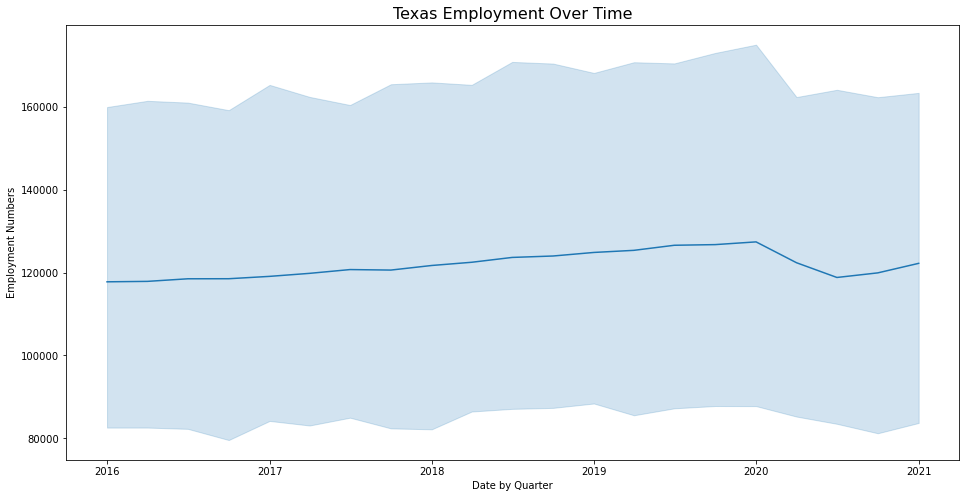

In [14]:
# Time to graph
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp", 
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Texas Employment Over Time', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Employment Numbers')
plt.show()

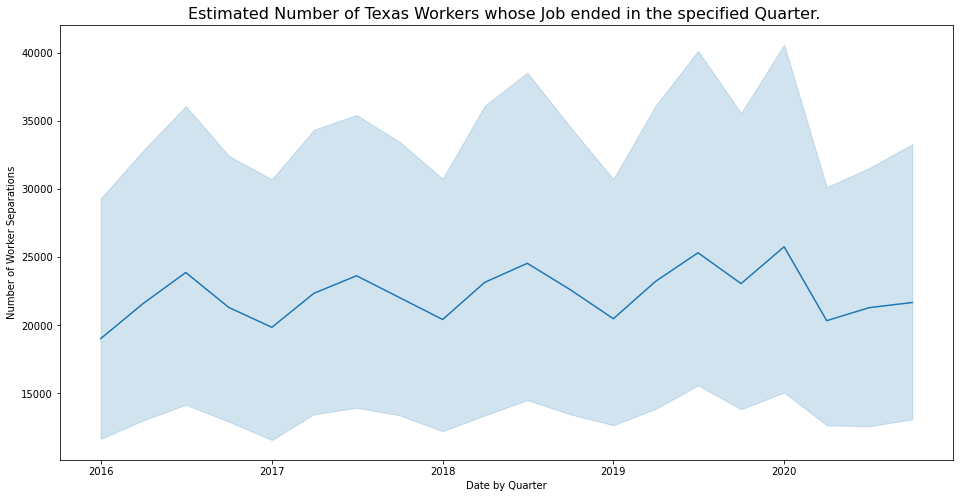

In [15]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Sep",
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

In [16]:
census_light[census_light.Sep.isnull()].sort_values('date')

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1421,482,Rail Transportation,3,43,NaN,NaN,NaN,2019-07-01
2030,531,Real Estate,1,159501,NaN,NaN,NaN,2021-01-01
2029,525,"Funds, Trusts, and Other Financial Vehicles",1,2072,NaN,NaN,NaN,2021-01-01
2028,524,Insurance Carriers and Related Activities,1,209880,NaN,NaN,NaN,2021-01-01
2027,523,"Securities, Commodity Contracts, and Other Fin...",1,75981,NaN,NaN,NaN,2021-01-01
...,...,...,...,...,...,...,...,...
1987,333,Machinery Manufacturing,1,85943,NaN,NaN,NaN,2021-01-01
1986,332,Fabricated Metal Product Manufacturing,1,112532,NaN,NaN,NaN,2021-01-01
1985,331,Primary Metal Manufacturing,1,19150,NaN,NaN,NaN,2021-01-01
1983,326,Plastics and Rubber Products Manufacturing,1,39077,NaN,NaN,NaN,2021-01-01


In [17]:
sum_by_date = census_light.groupby('date').sum()
sum_by_date

,industry,quarter,Emp,Sep,SepBeg,SepBegR
date,,,,,,
2016-01-01,46866,98,11540642,1863697.0,1328833.0,11.188
2016-04-01,46866,196,11551071,2117030.0,1457851.0,10.506
2016-07-01,46866,294,11612257,2339669.0,1608569.0,11.790
2016-10-01,46866,392,11613729,2088249.0,1361174.0,10.678
2017-01-01,46866,98,11669397,1945426.0,1358990.0,11.104
2017-04-01,46866,196,11740861,2190541.0,1505580.0,10.505
2017-07-01,46866,294,11830147,2316261.0,1601575.0,11.483
2017-10-01,46866,392,11818254,2159209.0,1395959.0,11.415
2018-01-01,46866,98,11926823,2001625.0,1397961.0,10.562


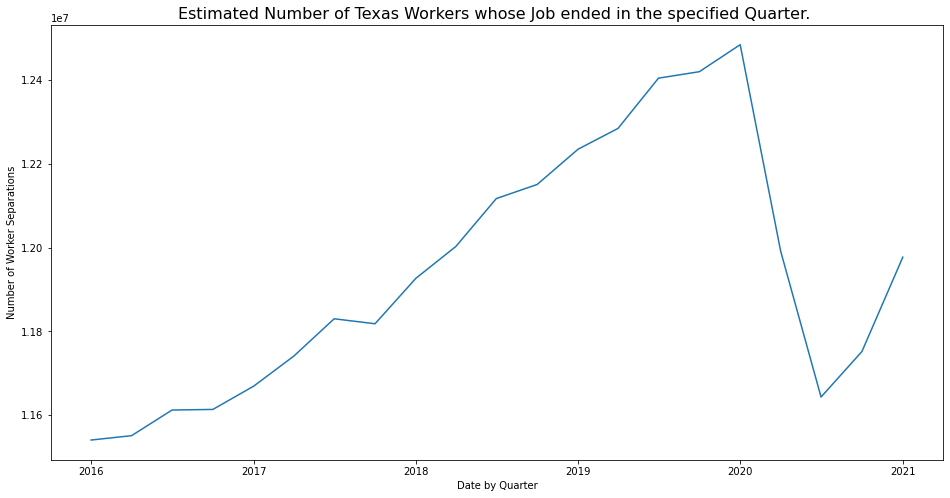

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

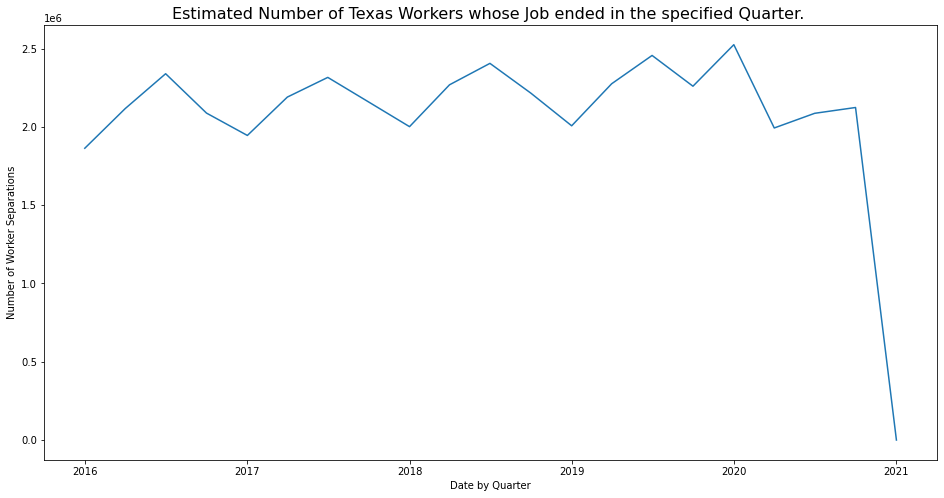

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Sep",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

In [20]:
# Exploring grouping by industry and mean employment 
pd.DataFrame(census_light.groupby('industry_name').Emp.mean())

,Emp
industry_name,
Accommodation,116864.000000
Administration of Economic Programs,12265.380952
Administration of Environmental Quality Programs,10560.380952
"Administration of Housing Programs, Urban Planning, and Community Development",4887.714286
Administration of Human Resource Programs,32261.904762
...,...
Warehousing and Storage,94766.190476
Waste Management and Remediation Services,40790.285714
Water Transportation,4091.380952


In [21]:
census_light[census_light.date == '2020-01-01']

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1568,111,Crop Production,1,18802,4172.0,2529.0,0.133,2020-01-01
1569,112,Animal Production and Aquaculture,1,26304,3609.0,2534.0,0.095,2020-01-01
1570,113,Forestry and Logging,1,1610,300.0,216.0,0.135,2020-01-01
1571,114,"Fishing, Hunting and Trapping",1,626,175.0,119.0,0.202,2020-01-01
1572,115,Support Activities for Agriculture and Forestry,1,10427,3181.0,2299.0,0.228,2020-01-01
...,...,...,...,...,...,...,...,...
1661,923,Administration of Human Resource Programs,1,33284,1744.0,1509.0,0.045,2020-01-01
1662,924,Administration of Environmental Quality Programs,1,10572,405.0,369.0,0.035,2020-01-01
1663,925,"Administration of Housing Programs, Urban Plan...",1,5069,418.0,370.0,0.074,2020-01-01
1664,926,Administration of Economic Programs,1,12619,797.0,668.0,0.053,2020-01-01


In [22]:
census_light[census_light.date == '2020-01-01'].Sep.sum() + census_light[census_light.date == '2020-01-01'].Emp.sum()

15009720.0

In [23]:
pd.DataFrame(census_light.groupby('industry_name').Sep.mean())

,Sep
industry_name,
Accommodation,31978.30
Administration of Economic Programs,737.60
Administration of Environmental Quality Programs,435.80
"Administration of Housing Programs, Urban Planning, and Community Development",300.05
Administration of Human Resource Programs,1812.65
...,...
Warehousing and Storage,20524.70
Waste Management and Remediation Services,6902.35
Water Transportation,481.50


In [24]:
census_light.Sep.isnull().value_counts()

False    1959
True       99
Name: Sep, dtype: int64

In [25]:
census_light.Emp.isnull().value_counts()

False    2058
Name: Emp, dtype: int64

In [26]:
census_light.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
1,112,Animal Production and Aquaculture,1,23871,3397.0,2356.0,0.098,2016-01-01
2,113,Forestry and Logging,1,1705,263.0,193.0,0.113,2016-01-01
3,114,"Fishing, Hunting and Trapping",1,570,93.0,72.0,0.128,2016-01-01
4,115,Support Activities for Agriculture and Forestry,1,11364,4395.0,3235.0,0.304,2016-01-01


In [27]:
census_light[(census_light.date == '2020-04-01') | (census_light.date == '2020-07-01')]

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1666,111,Crop Production,2,19256,4380.0,2912.0,0.153,2020-04-01
1667,112,Animal Production and Aquaculture,2,26834,3521.0,2441.0,0.090,2020-04-01
1668,113,Forestry and Logging,2,1584,267.0,169.0,0.105,2020-04-01
1669,114,"Fishing, Hunting and Trapping",2,551,61.0,38.0,0.068,2020-04-01
1670,115,Support Activities for Agriculture and Forestry,2,9773,3489.0,1685.0,0.170,2020-04-01
...,...,...,...,...,...,...,...,...
1857,923,Administration of Human Resource Programs,3,33165,96.0,0.0,0.000,2020-07-01
1858,924,Administration of Environmental Quality Programs,3,10723,82.0,0.0,0.000,2020-07-01
1859,925,"Administration of Housing Programs, Urban Plan...",3,4910,309.0,247.0,0.050,2020-07-01
1860,926,Administration of Economic Programs,3,12621,1147.0,984.0,0.080,2020-07-01


In [28]:
# Top 10 Job loss by industry for the second quarter of 2020 using Sep:
q2_jobloss = census_light[(census_light.date == '2020-04-01')].sort_values('Sep', ascending=False).head(10)
q2_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1752,722,Food Services and Drinking Places,2,933518,281848.0,202677.0,0.220,2020-04-01
1741,561,Administrative and Support Services,2,735737,272692.0,161824.0,0.222,2020-04-01
1743,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01
1739,541,"Professional, Scientific, and Technical Services",2,851335,105549.0,85937.0,0.102,2020-04-01
1744,621,Ambulatory Health Care Services,2,757051,101788.0,80030.0,0.106,2020-04-01
1677,238,Specialty Trade Contractors,2,422701,78666.0,58253.0,0.139,2020-04-01
1711,452,General Merchandise Stores,2,278835,55758.0,31373.0,0.110,2020-04-01
1673,213,Support Activities for Mining,2,137409,48171.0,43887.0,0.370,2020-04-01
1746,623,Nursing and Residential Care Facilities,2,202448,47618.0,33655.0,0.169,2020-04-01
1676,237,Heavy and Civil Engineering Construction,2,211164,45306.0,35231.0,0.171,2020-04-01


In [71]:
# Top 10 Job loss by industry for the second quarter of 2020:
q2_jobloss = census_light[(census_light.date == '2020-04-01')].sort_values('Sep', ascending=False).head(10)
q2_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
1752,722,Food Services and Drinking Places,2,933518,281848.0,202677.0,0.220,2020-04-01,2020
1741,561,Administrative and Support Services,2,735737,272692.0,161824.0,0.222,2020-04-01,2020
1743,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01,2020
1739,541,"Professional, Scientific, and Technical Services",2,851335,105549.0,85937.0,0.102,2020-04-01,2020
1744,621,Ambulatory Health Care Services,2,757051,101788.0,80030.0,0.106,2020-04-01,2020
1677,238,Specialty Trade Contractors,2,422701,78666.0,58253.0,0.139,2020-04-01,2020
1711,452,General Merchandise Stores,2,278835,55758.0,31373.0,0.110,2020-04-01,2020
1673,213,Support Activities for Mining,2,137409,48171.0,43887.0,0.370,2020-04-01,2020
1746,623,Nursing and Residential Care Facilities,2,202448,47618.0,33655.0,0.169,2020-04-01,2020
1676,237,Heavy and Civil Engineering Construction,2,211164,45306.0,35231.0,0.171,2020-04-01,2020


In [72]:
# Top 10 Job loss by industry for the third quarter of 2020:
q3_jobloss = census_light[(census_light.date == '2020-07-01')].sort_values('Sep', ascending=False).head(10)
q3_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
1850,722,Food Services and Drinking Places,3,909632,325072.0,210222.0,0.228,2020-07-01,2020
1839,561,Administrative and Support Services,3,718805,321194.0,158738.0,0.215,2020-07-01,2020
1841,611,Educational Services,3,1141190,131971.0,109424.0,0.095,2020-07-01,2020
1842,621,Ambulatory Health Care Services,3,749271,107268.0,78798.0,0.104,2020-07-01,2020
1837,541,"Professional, Scientific, and Technical Services",3,836229,104449.0,78371.0,0.093,2020-07-01,2020
1775,238,Specialty Trade Contractors,3,415014,81055.0,58352.0,0.141,2020-07-01,2020
1809,452,General Merchandise Stores,3,291653,57824.0,38832.0,0.132,2020-07-01,2020
1804,445,Food and Beverage Stores,3,248841,46608.0,33736.0,0.135,2020-07-01,2020
1845,624,Social Assistance,3,239831,46238.0,34531.0,0.145,2020-07-01,2020
1844,623,Nursing and Residential Care Facilities,3,195422,45982.0,31949.0,0.164,2020-07-01,2020


#### 2020 Q1 minus Q3 Calculations:

In [88]:
# Top 10 Job loss by industry of 2020 using q1 Emp minus q3 Emp:
q1 = census_light[['industry', 'industry_name', 'Emp', 'date']][census_light.date == '2020-01-01']
q3 = census_light[['industry', 'industry_name', 'Emp', 'date']][census_light.date == '2020-07-01']

In [91]:
# match indexes so that I can subtract the quarterly columns
q1.set_index('industry', drop=True, inplace=True)
q3.set_index('industry', drop=True, inplace=True)

In [95]:
# Subtract 2020 q1 - q3 employment:
q1_minus_q3 = q1.Emp - q3.Emp

In [ ]:
# Add q3 numbers to the datafram for ease of comparison if needed:
q1['q3_Emp'] = q3.Emp

In [96]:
# Create the difference column:
q1['q1_minus_q3'] = q1_minus_q3

In [100]:
# Rename to q since the dataframe now contains q1 and q3 data:
q = q1

In [101]:
q.head()

,industry_name,Emp,date,q1_minus_q3,q3_Emp
industry,,,,,
111,Crop Production,18802,2020-01-01,-119,18921
112,Animal Production and Aquaculture,26304,2020-01-01,-1002,27306
113,Forestry and Logging,1610,2020-01-01,-16,1626
114,"Fishing, Hunting and Trapping",626,2020-01-01,60,566
115,Support Activities for Agriculture and Forestry,10427,2020-01-01,413,10014


#### Plots of the difference of 2020 Q1 minus Q3 Employment levels

In [104]:
q = q.sort_values('q1_minus_q3', ascending=False)

In [105]:
q

,industry_name,Emp,date,q1_minus_q3,q3_Emp
industry,,,,,
722,Food Services and Drinking Places,1064574,2020-01-01,154942,909632
611,Educational Services,1267905,2020-01-01,126715,1141190
561,Administrative and Support Services,792704,2020-01-01,73899,718805
213,Support Activities for Mining,145908,2020-01-01,45686,100222
721,Accommodation,127215,2020-01-01,38961,88254
...,...,...,...,...,...
524,Insurance Carriers and Related Activities,208168,2020-01-01,-1554,209722
522,Credit Intermediation and Related Activities,271404,2020-01-01,-1678,273082
445,Food and Beverage Stores,238696,2020-01-01,-10145,248841


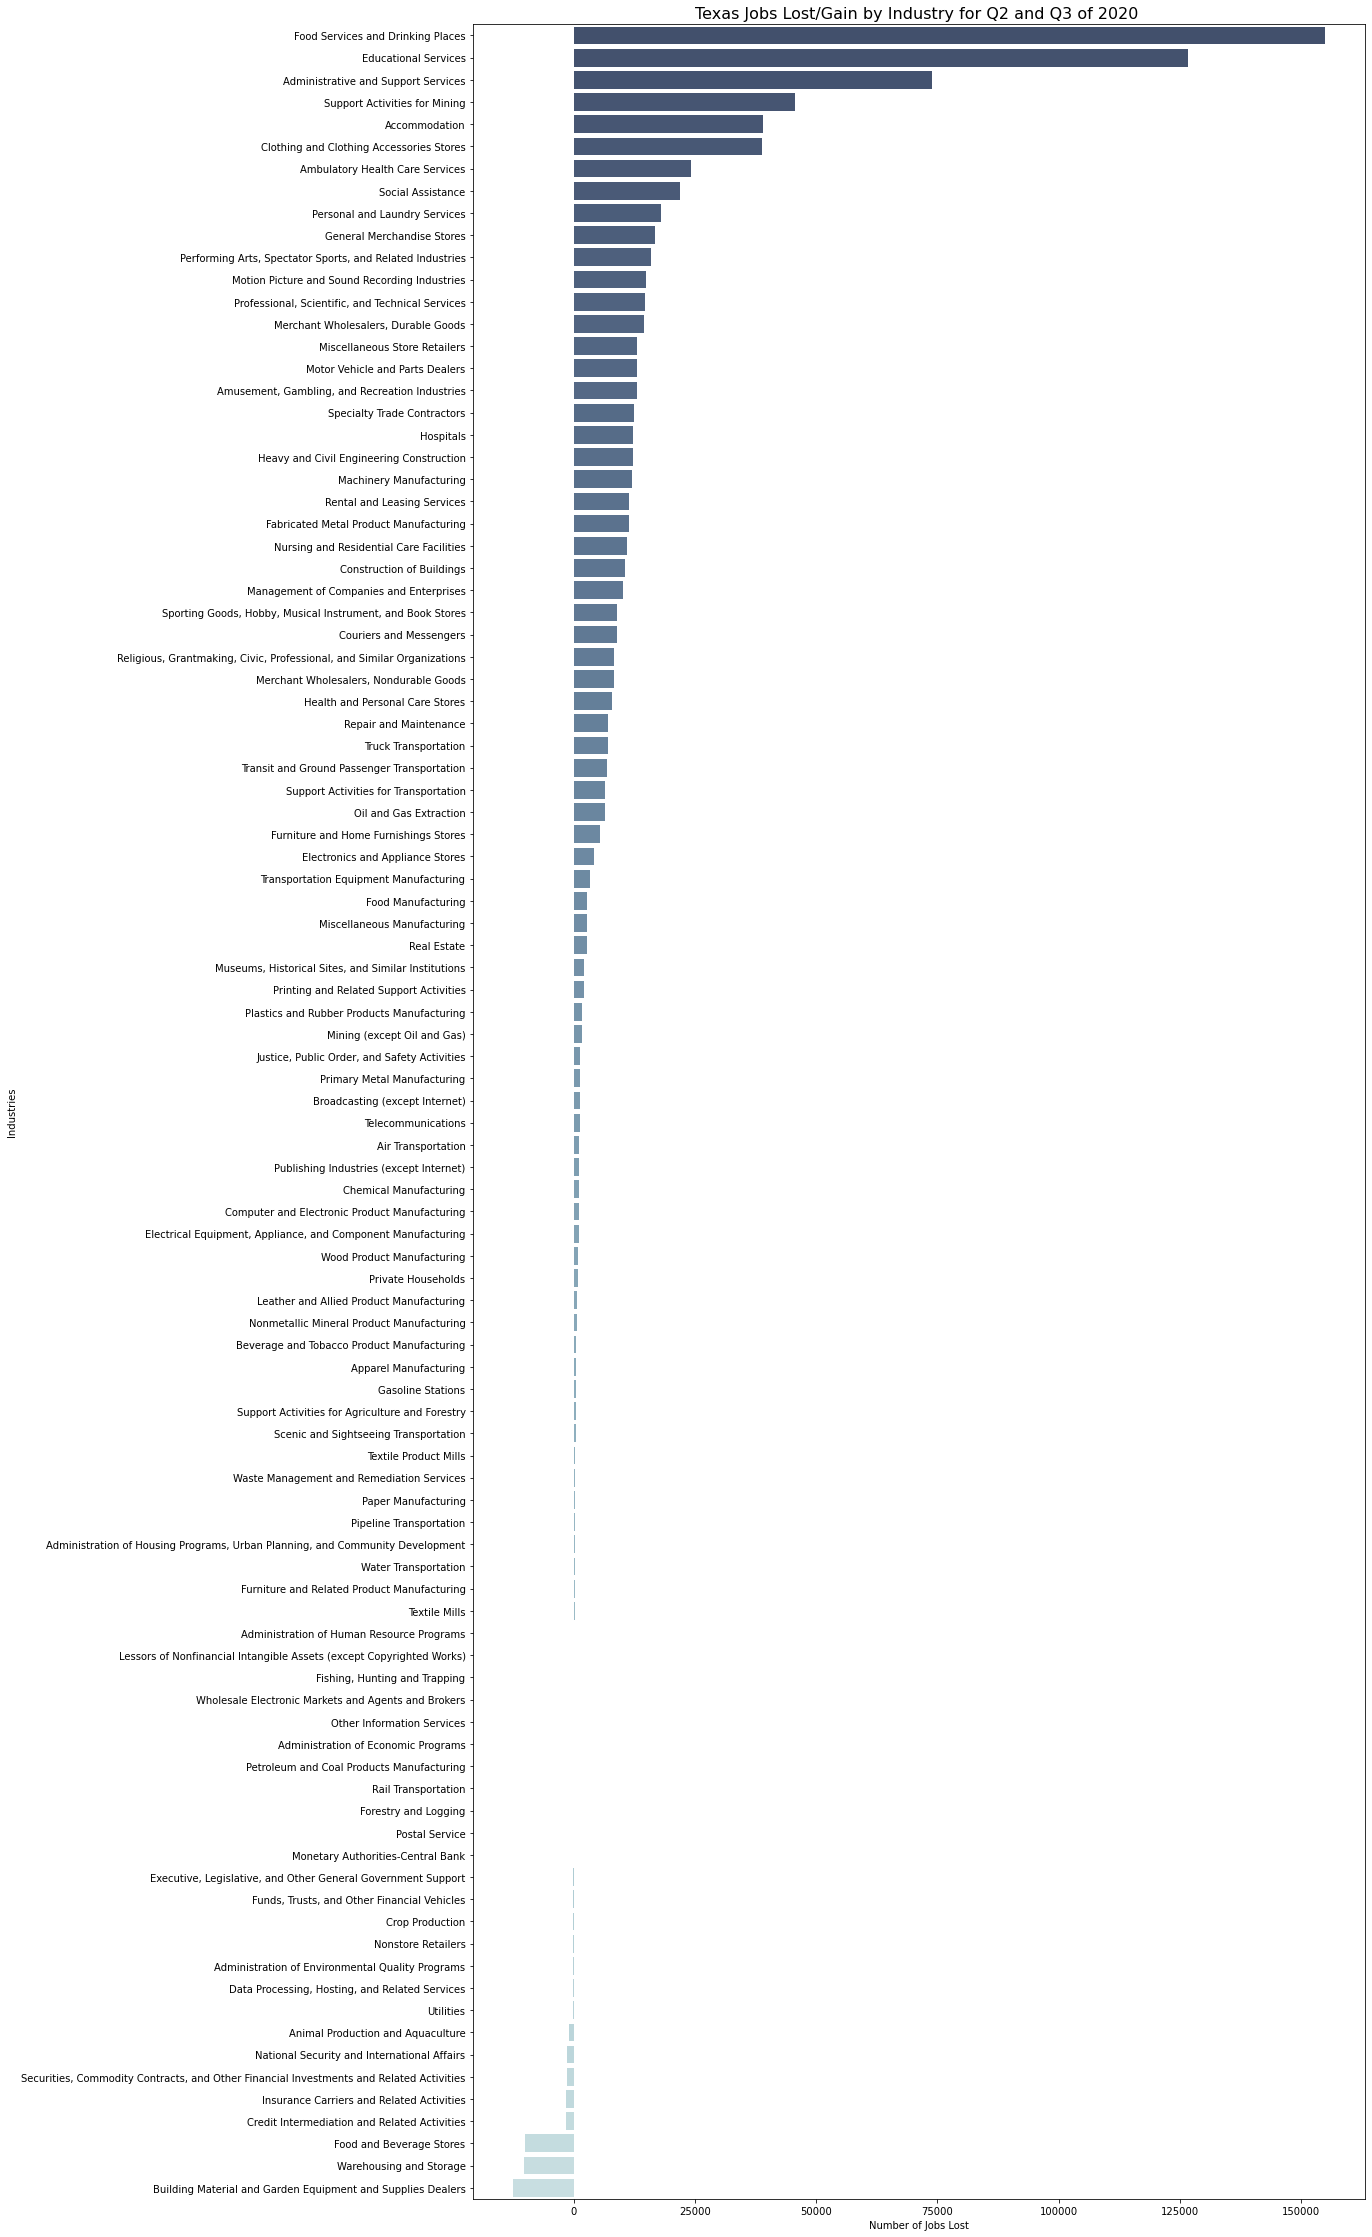

In [113]:
plt.figure(figsize=(16,40))
sns.barplot(x="q1_minus_q3", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=q, alpha=1)
plt.title('Texas Jobs Lost/Gain by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Plots using Sep

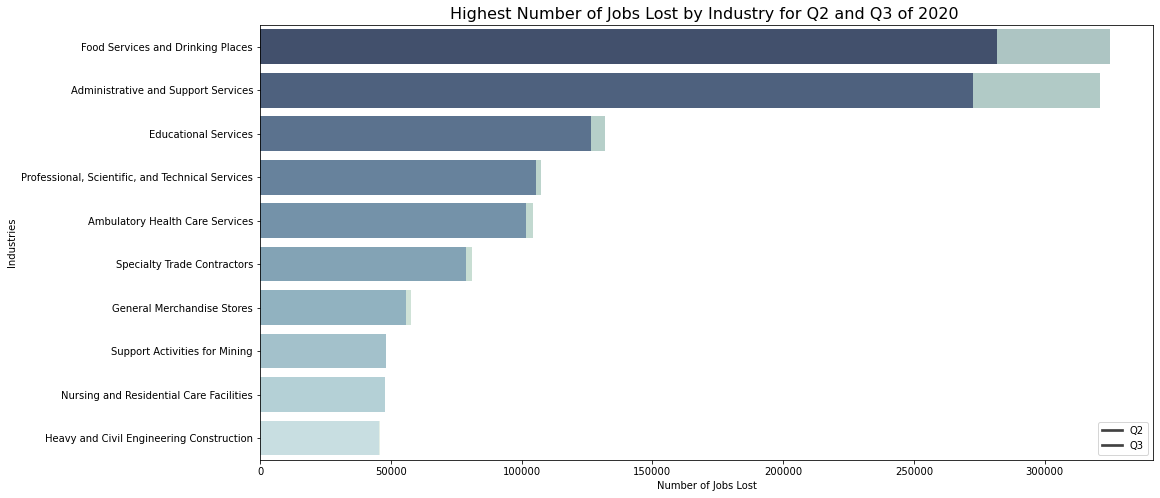

In [75]:
plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.4,d=.5_r",
                data=q3_jobloss, alpha=.5)
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=q2_jobloss)
plt.title('Highest Number of Jobs Lost by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.legend(['Q2', 'Q3'])
plt.show()

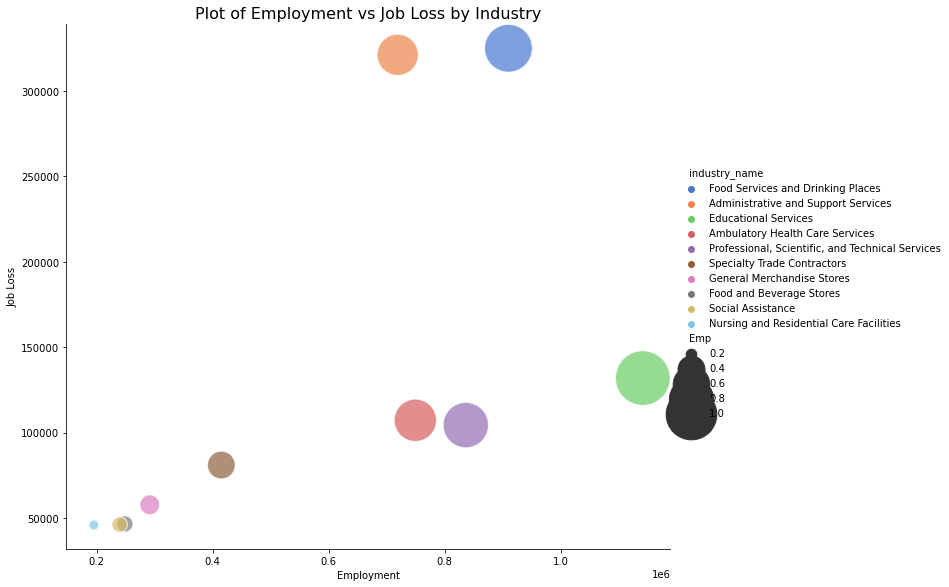

In [32]:
# Plot of Employment vs Job Loss by Industry
sns.relplot(
    data=q3_jobloss,
    x="Emp", y="Sep",
    hue="industry_name", size="Emp",
    palette="muted", alpha=.7,
    sizes=(100, 3000),
    height=8, aspect=1.2
)
plt.title('Plot of Employment vs Job Loss by Industry', fontsize=16)
plt.xlabel('Employment')
plt.ylabel('Job Loss')
plt.show()

In [33]:
census_light['year'] = census_light.date.dt.year

In [34]:
census_light.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01,2016
1,112,Animal Production and Aquaculture,1,23871,3397.0,2356.0,0.098,2016-01-01,2016
2,113,Forestry and Logging,1,1705,263.0,193.0,0.113,2016-01-01,2016
3,114,"Fishing, Hunting and Trapping",1,570,93.0,72.0,0.128,2016-01-01,2016
4,115,Support Activities for Agriculture and Forestry,1,11364,4395.0,3235.0,0.304,2016-01-01,2016


In [35]:
census_light = census_light[census_light.year != 2016]

In [120]:
# Function that creates a new dataframe with select indistries 
def select_industries(df, first_industry, list_of_remaining_industries):
    '''This function creates a dataframe out of the census data
    for only the selected industries'''
        # Use one of the industries to initiate the dataframe:
    df_new = df[df.industry == first_industry]
        # Loop through the remaining industries to combine all industries
    for industry in list_of_remaining_industries:
        industry_loss = df[df.industry == industry]
        df_new = pd.concat([df_new, industry_loss], ignore_index=True)

    return df_new

In [121]:
census_lighter = select_industries(census_light, 722, [561, 611])
census_lighter.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,722,Food Services and Drinking Places,1,984492,323132.0,207391.0,0.209,2017-01-01,2017
1,722,Food Services and Drinking Places,2,1003344,370415.0,231325.0,0.228,2017-04-01,2017
2,722,Food Services and Drinking Places,3,1026035,392871.0,254298.0,0.250,2017-07-01,2017
3,722,Food Services and Drinking Places,4,1007134,351393.0,218911.0,0.217,2017-10-01,2017
4,722,Food Services and Drinking Places,1,1007203,336070.0,213734.0,0.210,2018-01-01,2018


<AxesSubplot:xlabel='date', ylabel='Sep'>

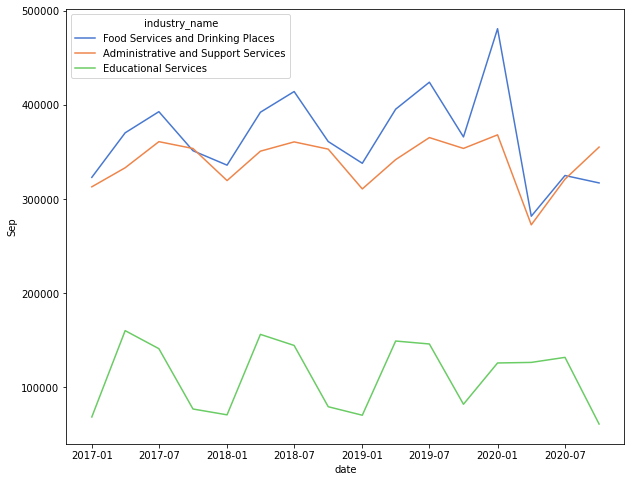

In [122]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Sep",
            hue="industry_name", palette="muted",
            data=census_lighter)

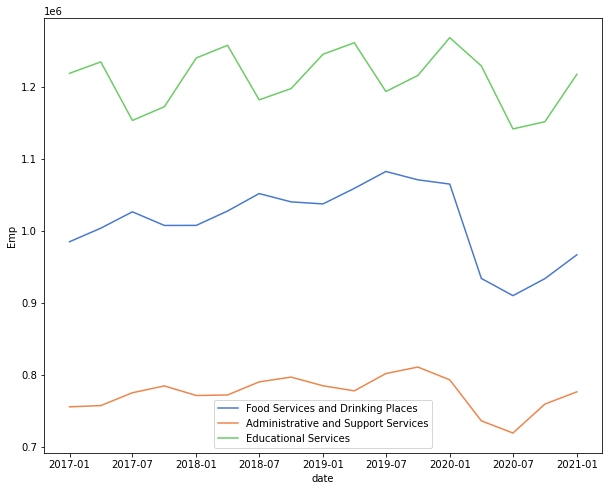

In [118]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter)
plt.legend()
plt.show()

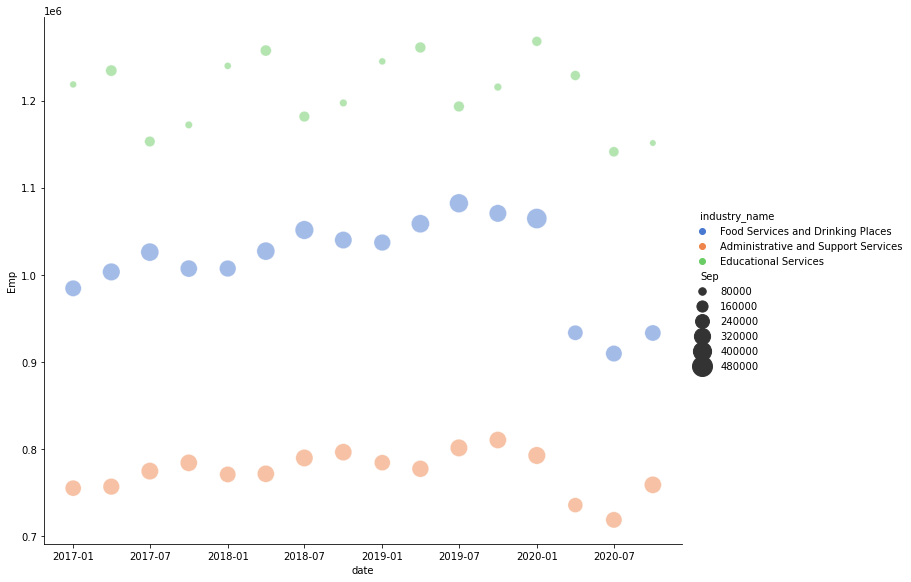

In [119]:
sns.relplot(x="date", y="Emp", hue="industry_name", size="Sep",
            sizes=(40, 400), alpha=.5, palette="muted",
            data=census_lighter,
            height=8, aspect=1.2)
plt.show()

### Industries with highest number of job loss compared to the industry size i.e. Normalized

In [123]:
census_lighter1 = select_industries(census_light, 713, [448, 512])
census_lighter1.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date,year
0,713,"Amusement, Gambling, and Recreation Industries",1,91525,20184.0,14453.0,0.154,2017-01-01,2017
1,713,"Amusement, Gambling, and Recreation Industries",2,96669,26430.0,17203.0,0.162,2017-04-01,2017
2,713,"Amusement, Gambling, and Recreation Industries",3,115554,45490.0,35580.0,0.333,2017-07-01,2017
3,713,"Amusement, Gambling, and Recreation Industries",4,98107,27175.0,19060.0,0.198,2017-10-01,2017
4,713,"Amusement, Gambling, and Recreation Industries",1,94921,21005.0,15211.0,0.156,2018-01-01,2018


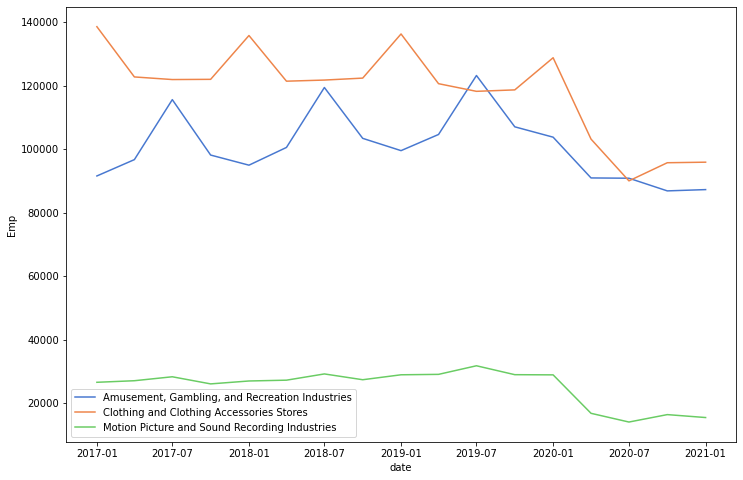

In [124]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter1)
plt.legend()
plt.show()

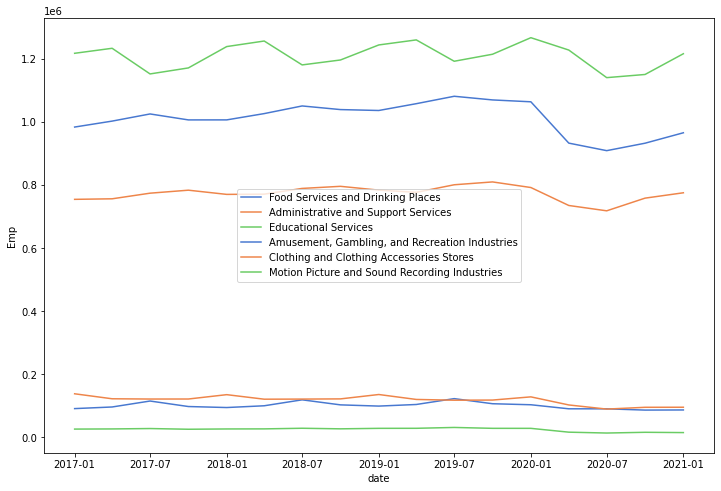

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter)
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter1)
plt.legend()
plt.show()

## Education Subgroup Data:

In [43]:
ed = pd.read_csv('LaborMarketWEducation.csv')

In [44]:
ed.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,FrmJbLs,EarnBeg,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,359.0,2161.0,NaN,1,1,1,1,1,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,242.0,2514.0,NaN,1,1,1,1,1,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,194.0,2770.0,NaN,1,1,1,1,1,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,102.0,3531.0,NaN,1,1,1,1,1,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,193.0,1529.0,NaN,1,1,1,1,1,1,5


In [56]:
def quarterly_dates(df):
    '''Takes in a dataframe with a year and a quarter column 
    and then combines them into a datetime timeseries column'''       
        # Adding a column with month number to represent the begining of a quarter year:
    df['first_month_qtr'] = df.quarter.apply(lambda x: '1' if x==1 
                                                             else '4' if x==2 
                                                             else '7' if x==3
                                                             else '10')
        # Combining month and year into a single column:
    df['quarterly'] = df.year.astype('string') + '-' + df.first_month_qtr.astype('string')
        # Transforming the month/year into datetime format:
    df['date'] = pd.to_datetime(df.quarterly)
        # Dropping the 'first_month_qtr' and 'quarterly' columns:
    col_to_drop = ['first_month_qtr', 'quarterly']
    df = df.drop(columns=col_to_drop)
    return df



def education_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWEducation.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'agegrp_label.value', 'race_label.value',
               'ethnicity_label.value', 'firmage_label.value', 'firmsize_label.value',
               'agegrp', 'race', 'ethnicity', 'firmage', 'firmsize', 
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [125]:
ed = education_census_data()
ed.head()

,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,1,Male,E1,Less than high school,2016,1,5650.0,945.0,2016-01-01
1,111,Crop Production,1,Male,E2,"High school or equivalent, no college",2016,1,3355.0,628.0,2016-01-01
2,111,Crop Production,1,Male,E3,Some college or Associate degree,2016,1,2754.0,501.0,2016-01-01
3,111,Crop Production,1,Male,E4,Bachelor's degree or advanced degree,2016,1,1430.0,241.0,2016-01-01
4,111,Crop Production,1,Male,E5,Educational attainment not available (workers ...,2016,1,1449.0,617.0,2016-01-01


In [141]:
# Creating a new dataframe with just the top three industries that lost the most employees
ed_top = select_industries(ed, 722, [561, 611])
ed_top.head(10)

,industry,industry_name,sex,sex_label.value,education,education_label.value,year,quarter,Emp,Sep,date
0,722,Food Services and Drinking Places,1,Male,E1,Less than high school,2016,1,84376.0,23354.0,2016-01-01
1,722,Food Services and Drinking Places,1,Male,E2,"High school or equivalent, no college",2016,1,91152.0,26315.0,2016-01-01
2,722,Food Services and Drinking Places,1,Male,E3,Some college or Associate degree,2016,1,84921.0,23792.0,2016-01-01
3,722,Food Services and Drinking Places,1,Male,E4,Bachelor's degree or advanced degree,2016,1,45131.0,11862.0,2016-01-01
4,722,Food Services and Drinking Places,1,Male,E5,Educational attainment not available (workers ...,2016,1,160753.0,71647.0,2016-01-01
5,722,Food Services and Drinking Places,2,Female,E1,Less than high school,2016,1,89137.0,22505.0,2016-01-01
6,722,Food Services and Drinking Places,2,Female,E2,"High school or equivalent, no college",2016,1,88405.0,23293.0,2016-01-01
7,722,Food Services and Drinking Places,2,Female,E3,Some college or Associate degree,2016,1,83983.0,22441.0,2016-01-01
8,722,Food Services and Drinking Places,2,Female,E4,Bachelor's degree or advanced degree,2016,1,43459.0,11027.0,2016-01-01
9,722,Food Services and Drinking Places,2,Female,E5,Educational attainment not available (workers ...,2016,1,186572.0,78564.0,2016-01-01


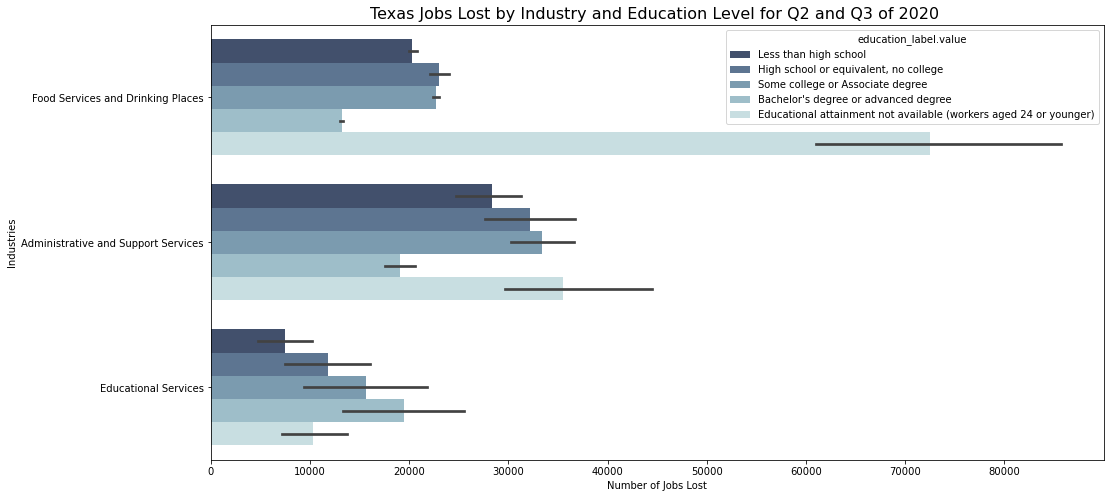

In [140]:
ed_q2q3_sep = ed_top[(ed_top.date == '2020-04-01') | (ed_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='education_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Education Level for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

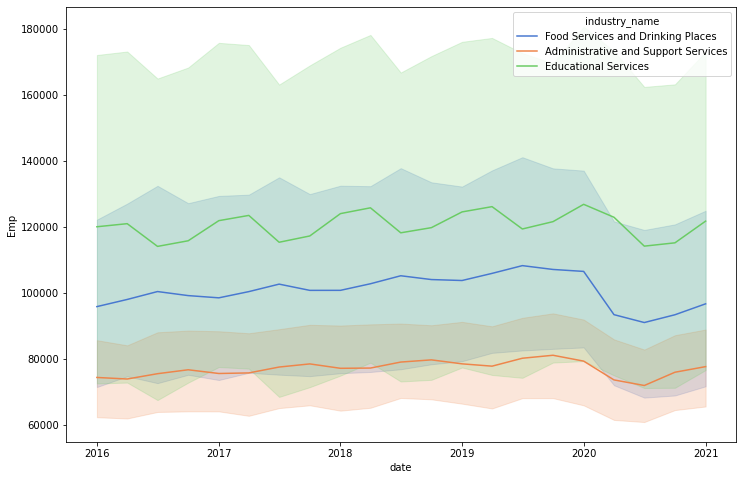

In [193]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp", 
            hue="industry_name", palette="muted",
            data=ed_top)
plt.show()

## Job loss by Male/Female for the Industries that loss the most Jobs

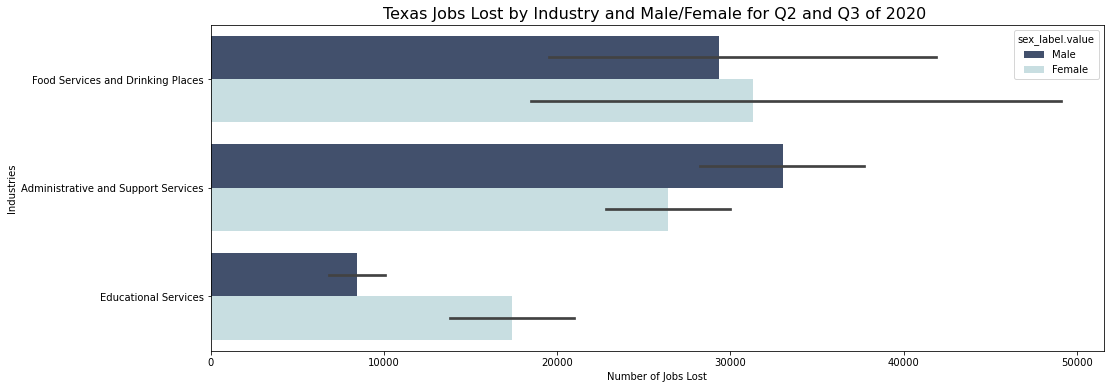

In [166]:
plt.figure(figsize=(16,6))
sns.barplot(x="Sep", y="industry_name",
                hue='sex_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Male/Female for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

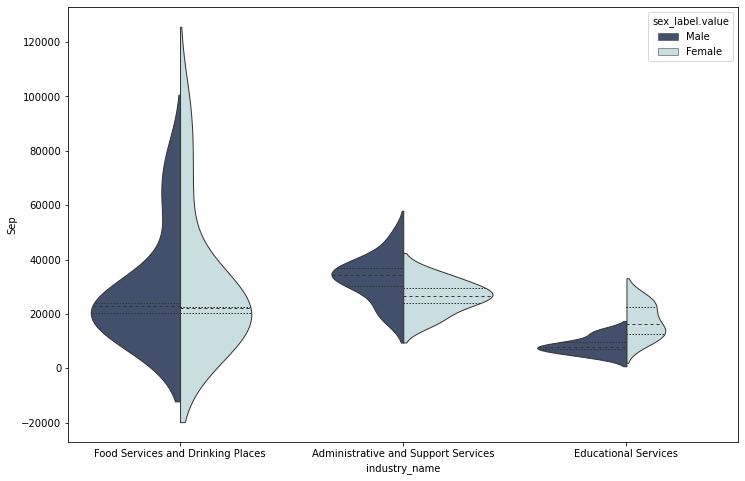

In [178]:
plt.figure(figsize=(12,8))
sns.violinplot(data=ed_q2q3_sep, x="industry_name", y="Sep", hue="sex_label.value",
               split=True, inner="quart", linewidth=1,
               palette='ch:r=-.2,d=.3_r')
plt.show()

## Age Subgroup Data:

In [150]:
def age_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWAge.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'race_label.value', 'agegrp', 'education', 'education_label.value',
               'ethnicity_label.value', 'firmage_label.value', 'firmsize_label.value',
               'race', 'ethnicity', 'firmage', 'firmsize', 'FrmJbC', 'HirAEndReplR', 'sFrmJbC', 'sHirAEndReplR',
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [151]:
age = age_census_data()
age.head()

,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,1,Male,14-18,2016,1,222.0,101.0,2016-01-01
1,111,Crop Production,1,Male,19-21,2016,1,581.0,281.0,2016-01-01
2,111,Crop Production,1,Male,22-24,2016,1,646.0,235.0,2016-01-01
3,111,Crop Production,1,Male,25-34,2016,1,2419.0,590.0,2016-01-01
4,111,Crop Production,1,Male,35-44,2016,1,2511.0,479.0,2016-01-01


In [154]:
# Creating a new dataframe with just the top three industries that lost the most employees
age_top = select_industries(age, 722, [561, 611])
age_top.head(10)

,industry,industry_name,sex,sex_label.value,agegrp_label.value,year,quarter,Emp,Sep,date
0,722,Food Services and Drinking Places,1,Male,14-18,2016,1,52672.0,23942.0,2016-01-01
1,722,Food Services and Drinking Places,1,Male,19-21,2016,1,58480.0,27388.0,2016-01-01
2,722,Food Services and Drinking Places,1,Male,22-24,2016,1,49600.0,20317.0,2016-01-01
3,722,Food Services and Drinking Places,1,Male,25-34,2016,1,115336.0,39618.0,2016-01-01
4,722,Food Services and Drinking Places,1,Male,35-44,2016,1,76034.0,21081.0,2016-01-01
5,722,Food Services and Drinking Places,1,Male,45-54,2016,1,56970.0,12520.0,2016-01-01
6,722,Food Services and Drinking Places,1,Male,55-64,2016,1,34938.0,6866.0,2016-01-01
7,722,Food Services and Drinking Places,1,Male,65-99,2016,1,22302.0,5239.0,2016-01-01
8,722,Food Services and Drinking Places,2,Female,14-18,2016,1,60529.0,26533.0,2016-01-01
9,722,Food Services and Drinking Places,2,Female,19-21,2016,1,70756.0,30867.0,2016-01-01


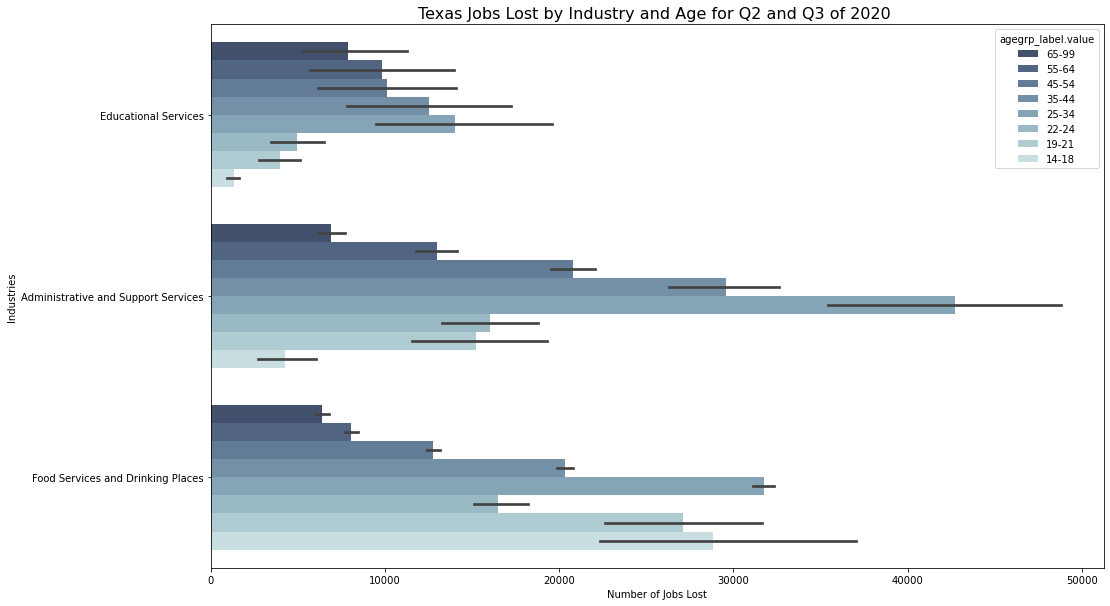

In [164]:
age_q2q3_sep = age_top[(age_top.date == '2020-04-01') | (age_top.date == '2020-07-01')].sort_values('agegrp_label.value', ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='agegrp_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=age_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

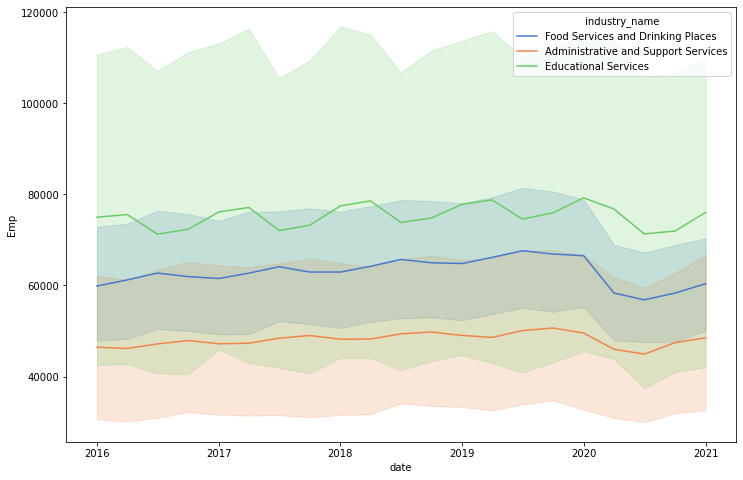

In [165]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=age_top)
plt.show()

## Race Subgroup Data:

In [184]:
def race_census_data():
    '''This function will take in a specific file with QWI education 
    data for the state of Texas. It will then clean the dataframe by 
    removing unneeded columns, and renaming a column in preparation 
    for exploration.'''
        # Read the CSV file:
    census = pd.read_csv('LaborMarketWRace.csv')
        # List of columns that need to be dropped:
    col_to_drop = ['sEmp', 'sSep', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'ownercode', 'HirA',
               'ownercode_label.value', 'agegrp_label.value', 'FrmJbC', 'HirAEndReplR', 
               'firmage_label.value', 'firmsize_label.value', 'sFrmJbC', 'sHirAEndReplR',
               'agegrp', 'firmage', 'firmsize', 'education', 'education_label.value',
               'FrmJbGn', 'FrmJbLs', 'EarnBeg', 'Payroll', 'sHirA', 'sFrmJbGn', 'sFrmJbLs', 'sEarnBeg', 'sPayroll']
        # Drop the list of columns:
    census_light = census.drop(columns=col_to_drop)
        # Renaming:
    census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})  
        # Adding quarters (i.e. quarter years) as a datetime format:
    census_light = quarterly_dates(census_light)
    return census_light 

In [185]:
r = race_census_data()
r.head()

,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date
0,111,Crop Production,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2016,1,8201.0,1514.0,2016-01-01
1,111,Crop Production,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2016,1,9739.0,2048.0,2016-01-01
2,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2016,1,877.0,303.0,2016-01-01
3,111,Crop Production,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2016,1,199.0,46.0,2016-01-01
4,111,Crop Production,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2016,1,56.0,14.0,2016-01-01


In [194]:
# dividing separations by employment
r['sep_div_emp'] = r.Sep / r.Emp

In [226]:
# Looking at just q2 2020
r_q2 = r[r.date == '2020-04-01'].sort_values('sep_div_emp', ascending=False).head(30)

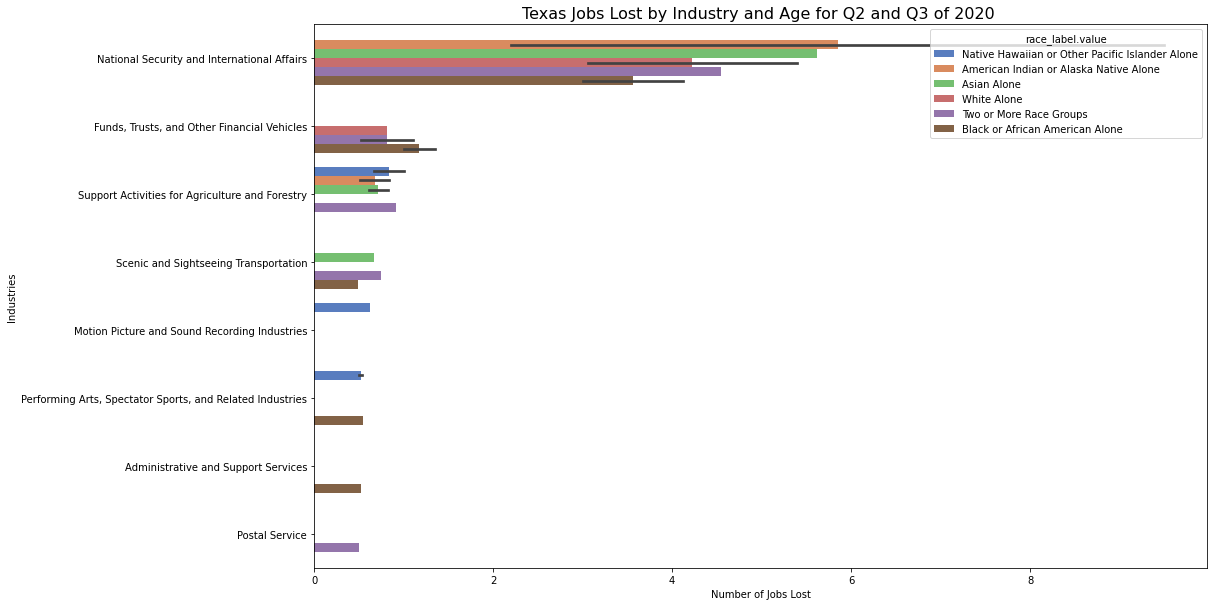

In [227]:
plt.figure(figsize=(16,10))
sns.barplot(x="sep_div_emp", y="industry_name",
                hue='race_label.value',
                palette="muted",
                data=r_q2, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

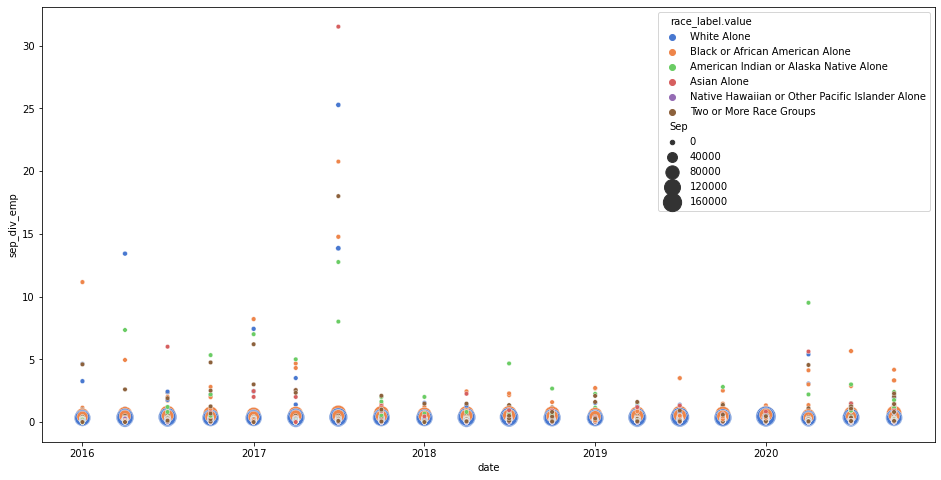

In [207]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="date", y="sep_div_emp",
                hue="race_label.value", size="Sep",
                palette="muted", sizes=(20, 400),
                data=r)
plt.show()

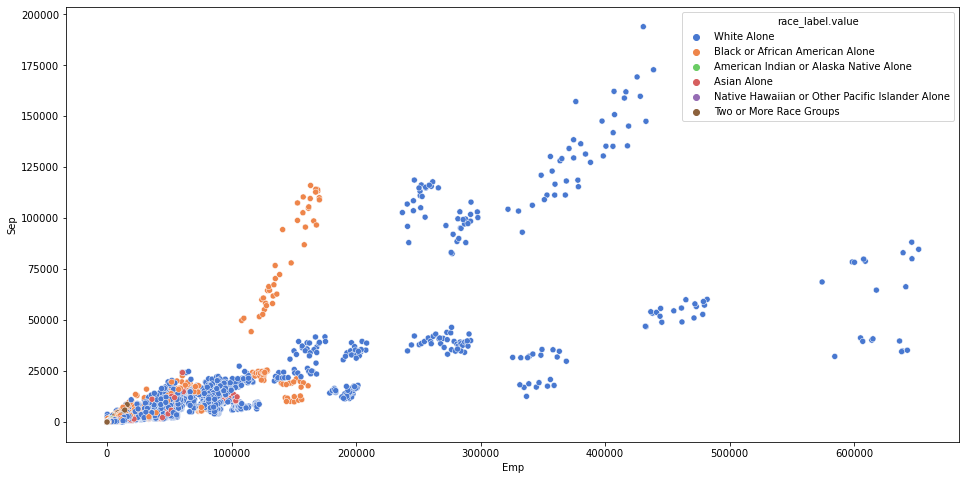

In [210]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="race_label.value", 
                palette="muted", sizes=(20, 400),
                data=r)
plt.show()

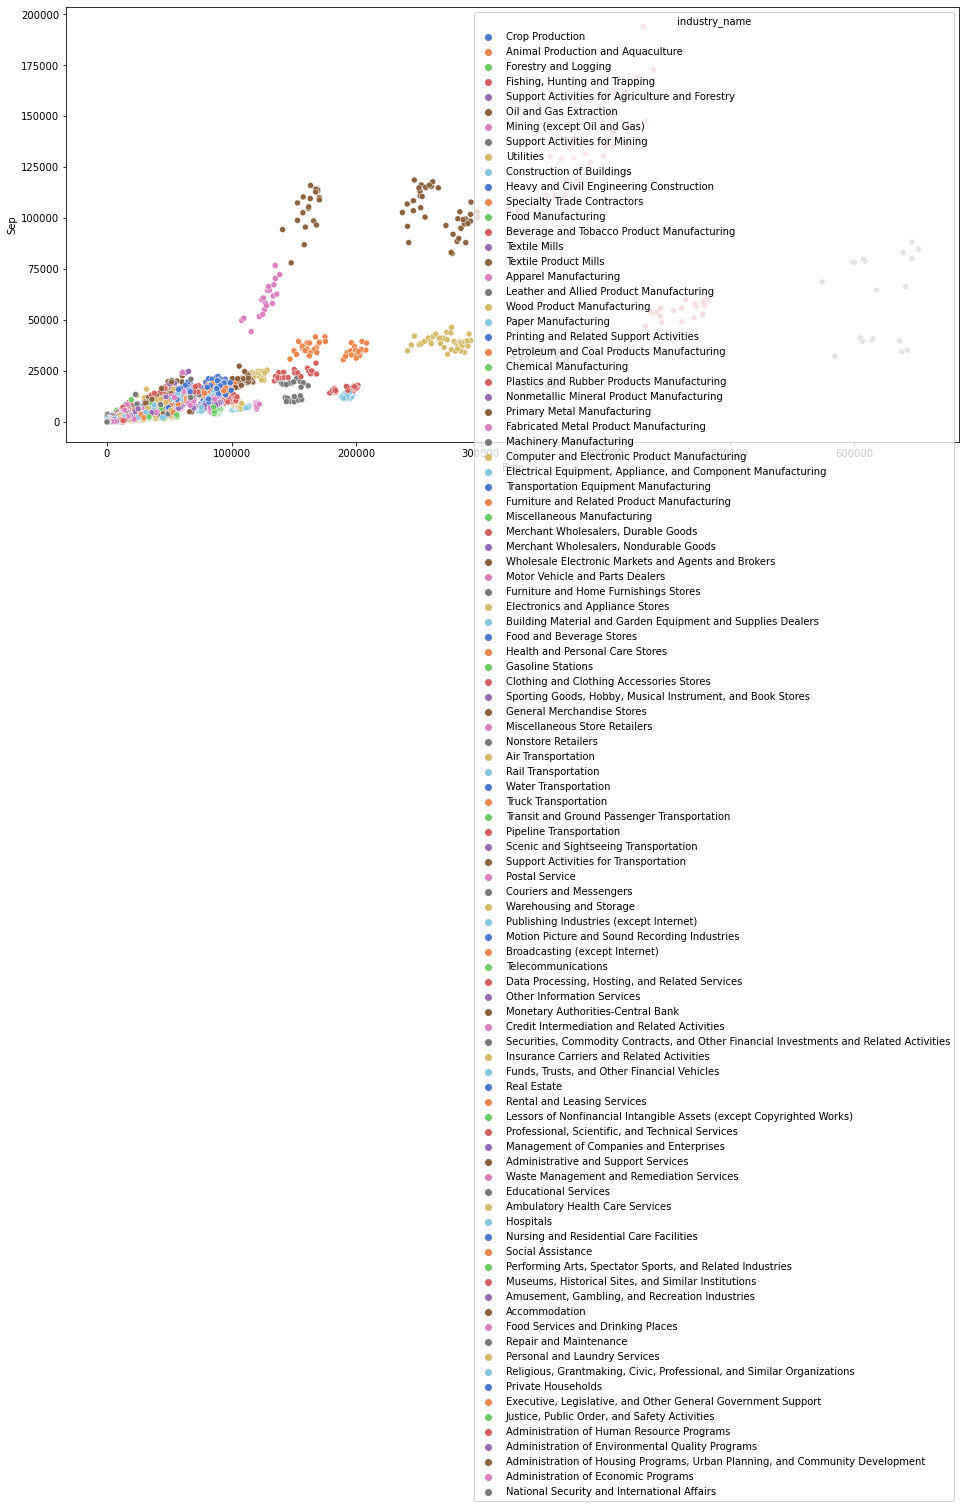

In [213]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Emp", y="Sep",
                hue="industry_name", 
                palette="muted", sizes=(20, 400),
                data=r)
plt.show()

In [187]:
# Creating a new dataframe with just the top three industries that lost the most employees
r_top = select_industries(r, 722, [561, 611])
r_top.head()

,industry,industry_name,sex,sex_label.value,race,race_label.value,ethnicity,ethnicity_label.value,year,quarter,Emp,Sep,date
0,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A1,Not Hispanic or Latino,2016,1,388271.0,127363.0,2016-01-01
1,722,Food Services and Drinking Places,0,All Sexes,A1,White Alone,A2,Hispanic or Latino,2016,1,341577.0,106330.0,2016-01-01
2,722,Food Services and Drinking Places,0,All Sexes,A2,Black or African American Alone,A1,Not Hispanic or Latino,2016,1,122313.0,51690.0,2016-01-01
3,722,Food Services and Drinking Places,0,All Sexes,A2,Black or African American Alone,A2,Hispanic or Latino,2016,1,9873.0,3600.0,2016-01-01
4,722,Food Services and Drinking Places,0,All Sexes,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,2016,1,3488.0,1361.0,2016-01-01


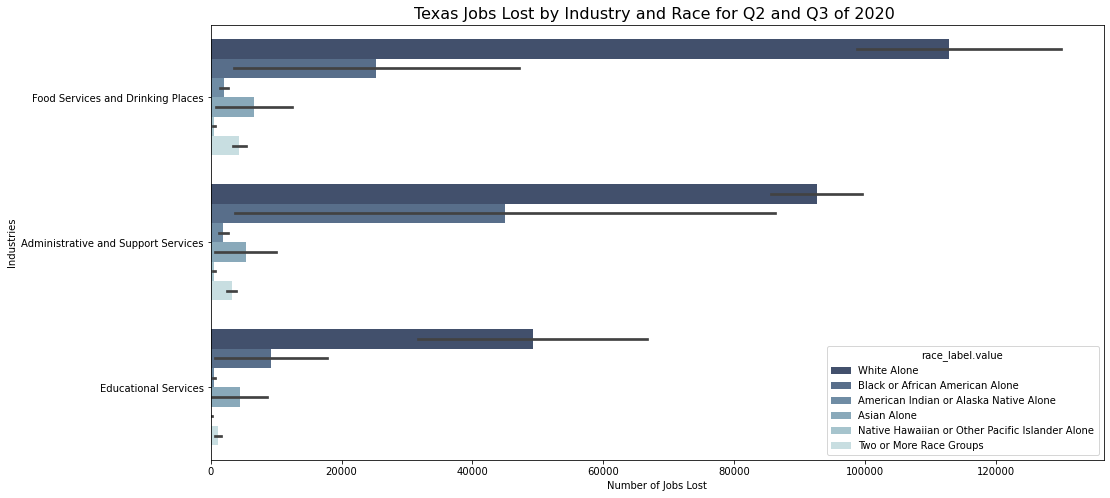

In [189]:
r_q2q3_sep = r_top[(r_top.date == '2020-04-01') | (r_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='race_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

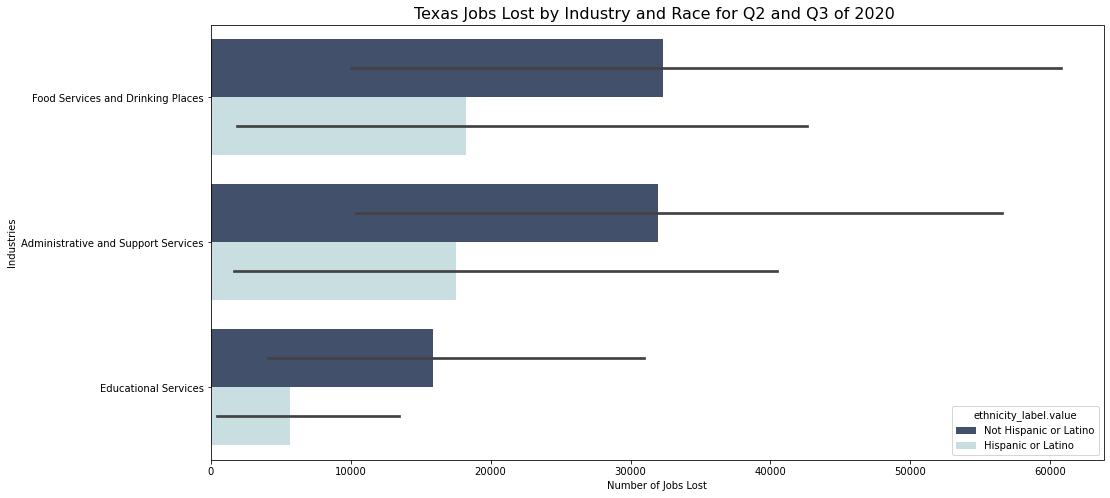

In [190]:
plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='ethnicity_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()